In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
plt.rcParams['figure.figsize'] = 16, 5
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

# STEP 1

In [56]:
from sklearn.datasets import fetch_openml


In [57]:

mnist = fetch_openml('mnist_784', version=1)



In [58]:
X, y = mnist['data'], mnist['target']

# MNIST 

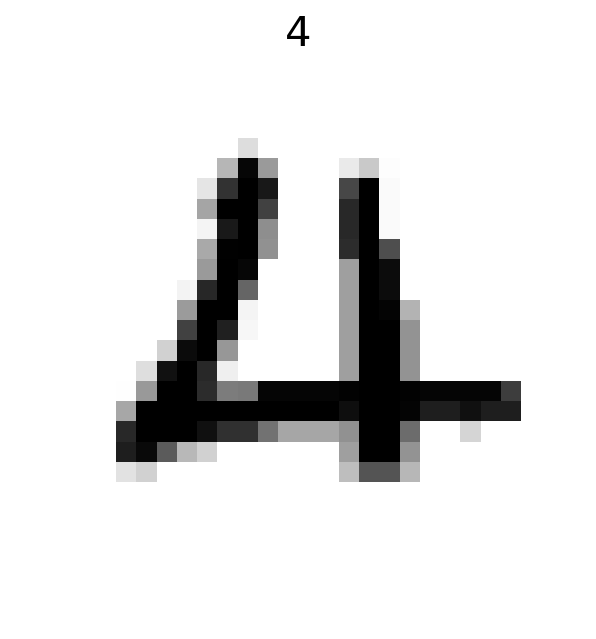

In [59]:
plt.imshow(X[1220].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(y[1220])
plt.show()

In [60]:
y = y.astype(np.uint8)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [62]:
X_train.shape


(63000, 784)

In [63]:
X_test.shape

(7000, 784)

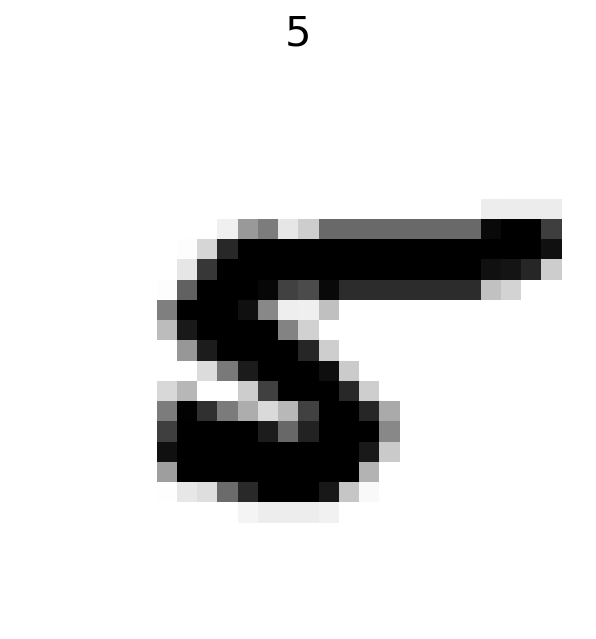

In [64]:
plt.imshow(X_train[35].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(y_train[35])
plt.show()

In [65]:
y_train_5 = (y_train == 5)



In [66]:
y_test_5 = (y_test == 5)



In [67]:
y_train_5[35]



True

# Model Selection


In [68]:

from sklearn.linear_model import SGDClassifier


In [69]:

from sklearn.ensemble import RandomForestClassifier


In [70]:
forest_clf = RandomForestClassifier()


In [71]:

sgd_clf = SGDClassifier(random_state=42)



# Fitting Training Data to Model


In [72]:
forest_clf.fit(X_train, y_train_5)


RandomForestClassifier()

In [73]:
RandomForestClassifier()



RandomForestClassifier()

In [74]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# Prediction



In [75]:
forest_clf.predict([X_train[3], X_train[103], X_train[35] ])



array([ True, False,  True])

In [78]:

sgd_clf.predict([X_train[3], X_train[103], X_train[35] ])





array([False, False,  True])

pos -> neg -> fn 

neg -> pos -> fp


In [79]:
forest_clf.predict_proba([X_train[3], X_train[103], X_train[35] ])


array([[0.15, 0.85],
       [1.  , 0.  ],
       [0.01, 0.99]])

In [80]:
sgd_clf.decision_function([X_train[3], X_train[103], X_train[35] ])


array([ -2317.90335308, -10230.9433525 ,   1206.70136954])

In [81]:
pred = forest_clf.predict(X_test)


In [91]:
pred_score = forest_clf.predict_proba(X_test)

In [92]:
y_pred = sgd_clf.predict(X_test)


In [93]:
y_pred_score = sgd_clf.decision_function(X_test)



In [94]:
y_pred_score[:5]




array([-3839.59782429, -7423.24861245,    -9.78486268, -7232.44682968,
       -7713.3124503 ])

In [115]:
pred_score[:5]



array([[0.97, 0.03],
       [1.  , 0.  ],
       [0.83, 0.17],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [116]:
acc_r = sum(y_test_5 == pred) / len(y_test_5)
acc_r

0.9897142857142858

In [117]:
acc = sum(y_test_5 == y_pred) / len(y_test_5)

In [118]:
acc

0.9684285714285714

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
print(confusion_matrix(y_test_5, y_pred)) # SGD

[[6289   53]
 [ 168  490]]


In [121]:
print(confusion_matrix(y_test_5, pred)) # Random Forrest

[[6340    2]
 [  70  588]]


In [122]:
from sklearn.metrics import precision_score

In [123]:
print(precision_score(y_test_5, y_pred)) # SGD

0.9023941068139963


In [124]:
print(precision_score(y_test_5, pred)) # Random Forrest

0.9966101694915255


In [125]:
from sklearn.metrics import recall_score

In [126]:
print(recall_score(y_test_5, y_pred)) # SGD

0.7446808510638298


In [127]:
print(recall_score(y_test_5, pred)) # Random Forrest

0.8936170212765957


In [128]:
from sklearn.metrics import f1_score

In [129]:
print(f1_score(y_test_5, y_pred)) # SGD

0.8159866777685262


In [130]:
print(f1_score(y_test_5, pred)) # Random Forrest

0.9423076923076923


In [131]:
y_pred_score[:20].astype(int)

array([ -3839,  -7423,     -9,  -7232,  -7713, -24795,  -8691,  -7840,
        -6084, -16331, -11988,  -5450,  -8929,  -8883, -10518,  12024,
        -8289,  -2911, -11649,  -6263])

In [132]:
print(precision_score(y_test_5, y_pred)) # SGD

0.9023941068139963


In [133]:
print(recall_score(y_test_5, y_pred)) # SGD

0.7446808510638298


In [134]:
thres = 0
p = y_pred_score > thres
print("Confusion Matrix: \n", confusion_matrix(y_test_5, p))
print("Precision: ", precision_score(y_test_5, p)) # SGD
print("Recall: ", recall_score(y_test_5, p)) # SGD

Confusion Matrix: 
 [[6289   53]
 [ 168  490]]
Precision:  0.9023941068139963
Recall:  0.7446808510638298


In [135]:
thres = 7000
p = y_pred_score > thres
print("Confusion Matrix: \n", confusion_matrix(y_test_5, p))
print("Precision: ", precision_score(y_test_5, p)) # SGD
print("Recall: ", recall_score(y_test_5, p)) # SGD

Confusion Matrix: 
 [[6340    2]
 [ 581   77]]
Precision:  0.9746835443037974
Recall:  0.11702127659574468


In [136]:
thres = -13000
p = y_pred_score > thres
print("Confusion Matrix: \n", confusion_matrix(y_test_5, p))
print("Precision: ", precision_score(y_test_5, p)) # SGD
print("Recall: ", recall_score(y_test_5, p)) # SGD

Confusion Matrix: 
 [[1185 5157]
 [   3  655]]
Precision:  0.11269786648313833
Recall:  0.9954407294832827


In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
scores = sgd_clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test_5, scores)

In [139]:
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], '--b', label='Precision')
    plt.plot(thresholds, recall[:-1], '-g', label='Recall')
    plt.legend(loc=1)
    plt.xlabel("Thresholds")
    plt.title('Precision vs Recall Tradeoff')
    
    plt.yticks(np.arange(0, 1.1, .1))
    plt.ylim([0, 1.2])
    plt.plot([-15000, 1000], [0.65, 0.65], 'r:o')
    plt.plot([-15000, 1000], [0.95, 0.95], 'r:o')
    plt.plot([1000, 1000], [0, 1], ':k')
    plt.grid()
    plt.show()

In [140]:
print("Precision: ", precision_score(y_test_5, y_pred)) # SGD
print("Recall: ",recall_score(y_test_5, y_pred)) # SGD

Precision:  0.9023941068139963
Recall:  0.7446808510638298


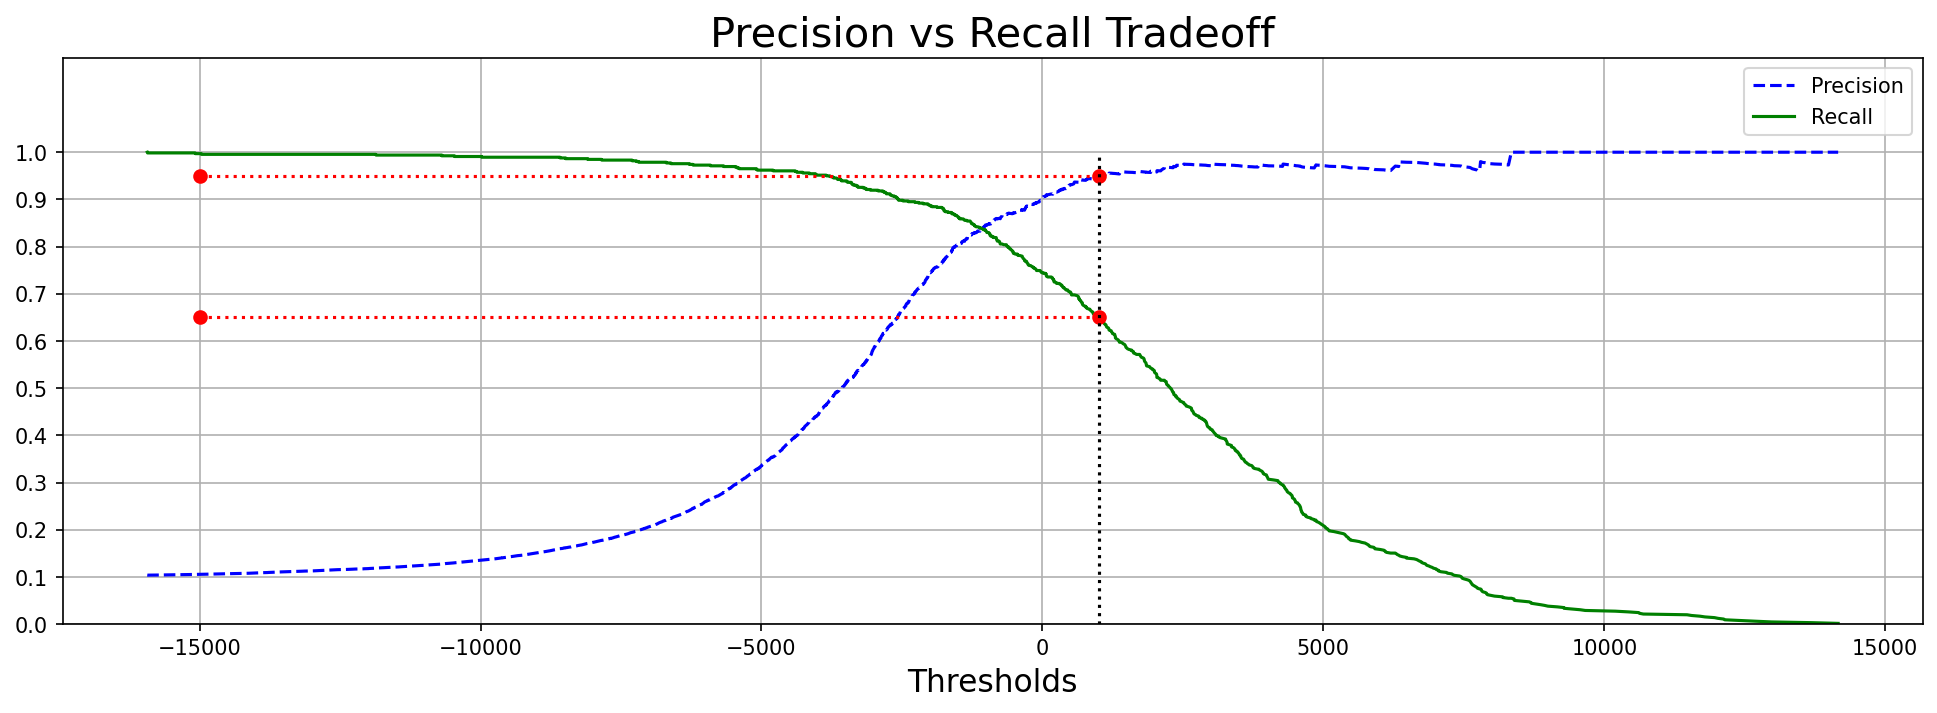

In [141]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

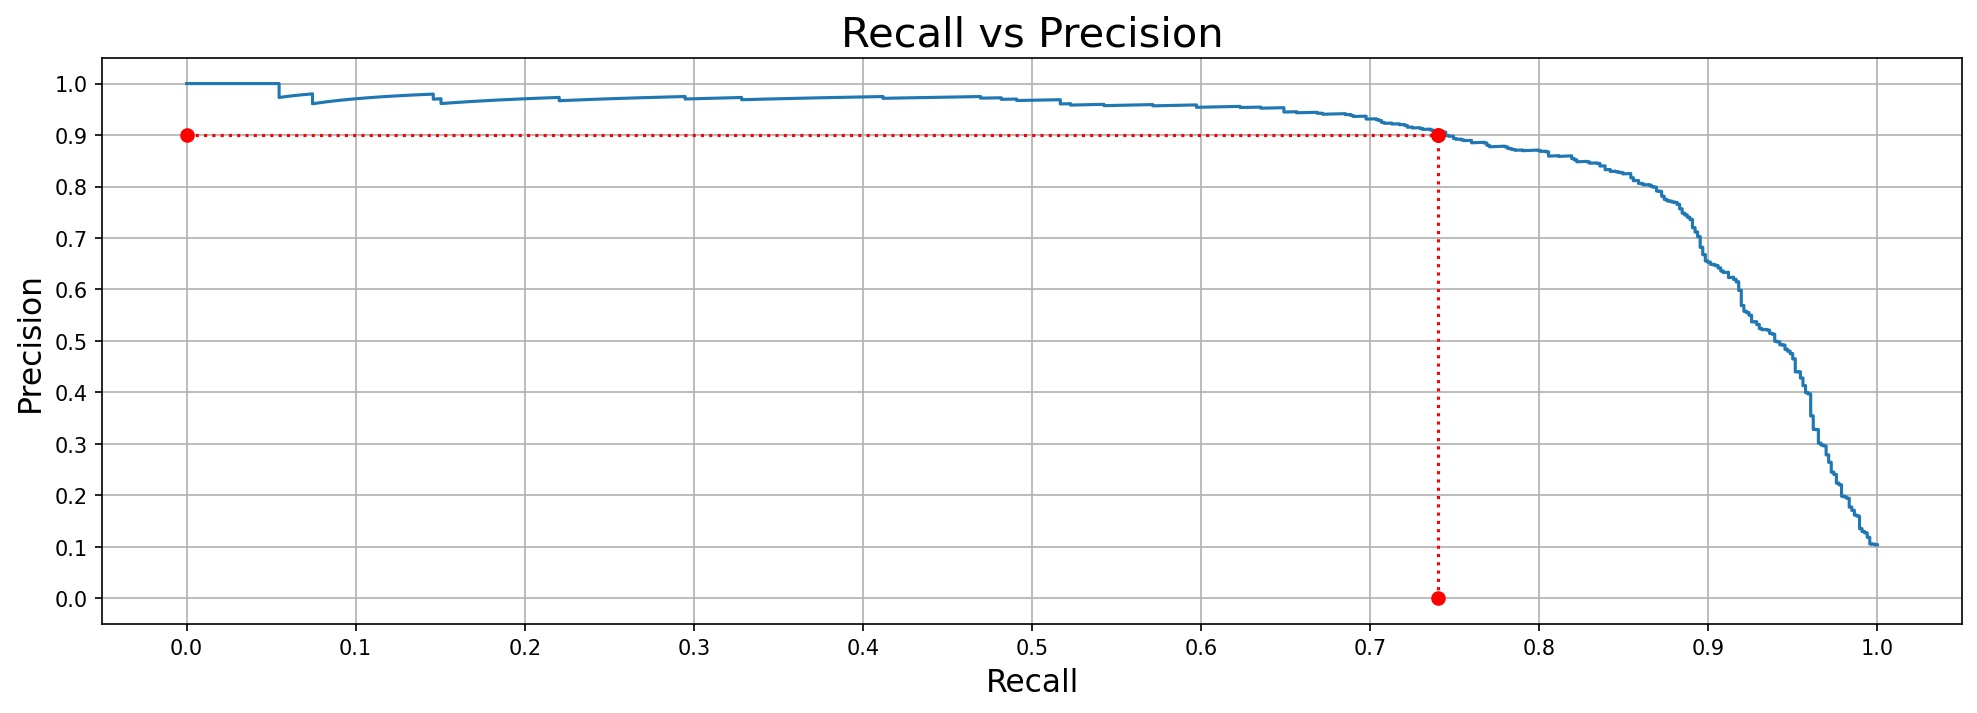

In [142]:
plt.title("Recall vs Precision")
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xticks(np.arange(0, 1.1, .1))
plt.yticks(np.arange(0, 1.1, .1))
plt.plot([0, 0.74], [0.9, 0.9], 'r:o')
plt.plot([0.74, 0.74], [0.0, 0.9], 'r:o')
plt.plot([])
plt.grid()
plt.show()


In [143]:
i = np.argmax(precision >= 0.90) # np.argmax -> index value of first True value 
i

5793

In [144]:
th = thresholds[i]

In [145]:
th

-9.78486267869981

In [146]:
p = y_pred_score > 0.9
precision_score(y_test_5, p)

0.9040590405904059

In [147]:
recall_score(y_test_5, p)

0.7446808510638298

In [148]:
i = np.argmax(y_pred_score >= 0.5)
th = y_pred_score[15]

In [149]:
th

12024.368948506426

In [150]:
p = y_pred_score > 9000

In [151]:
precision_score(y_test_5, p)

1.0

In [152]:
recall_score(y_test_5, p)

0.0364741641337386

# False Positive - 0 , pricision - 1 at what cost of recall 
## The ROC Curve
## The Receiver Operating Characteristic (ROC) Curve


## The Area Under the Curve (AUC) 

In [153]:
from sklearn.metrics import roc_curve

In [154]:
fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_score)

In [155]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, 'r--', lw=5, label=label)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.show()

In [156]:
i = np.argmax(tpr >= 0.45)

In [157]:

thresholds[i]

2515.4906445828915

In [158]:
p = y_pred_score >= thresholds[i]

In [159]:
confusion_matrix(y_test_5, p)

array([[6334,    8],
       [ 349,  309]], dtype=int64)

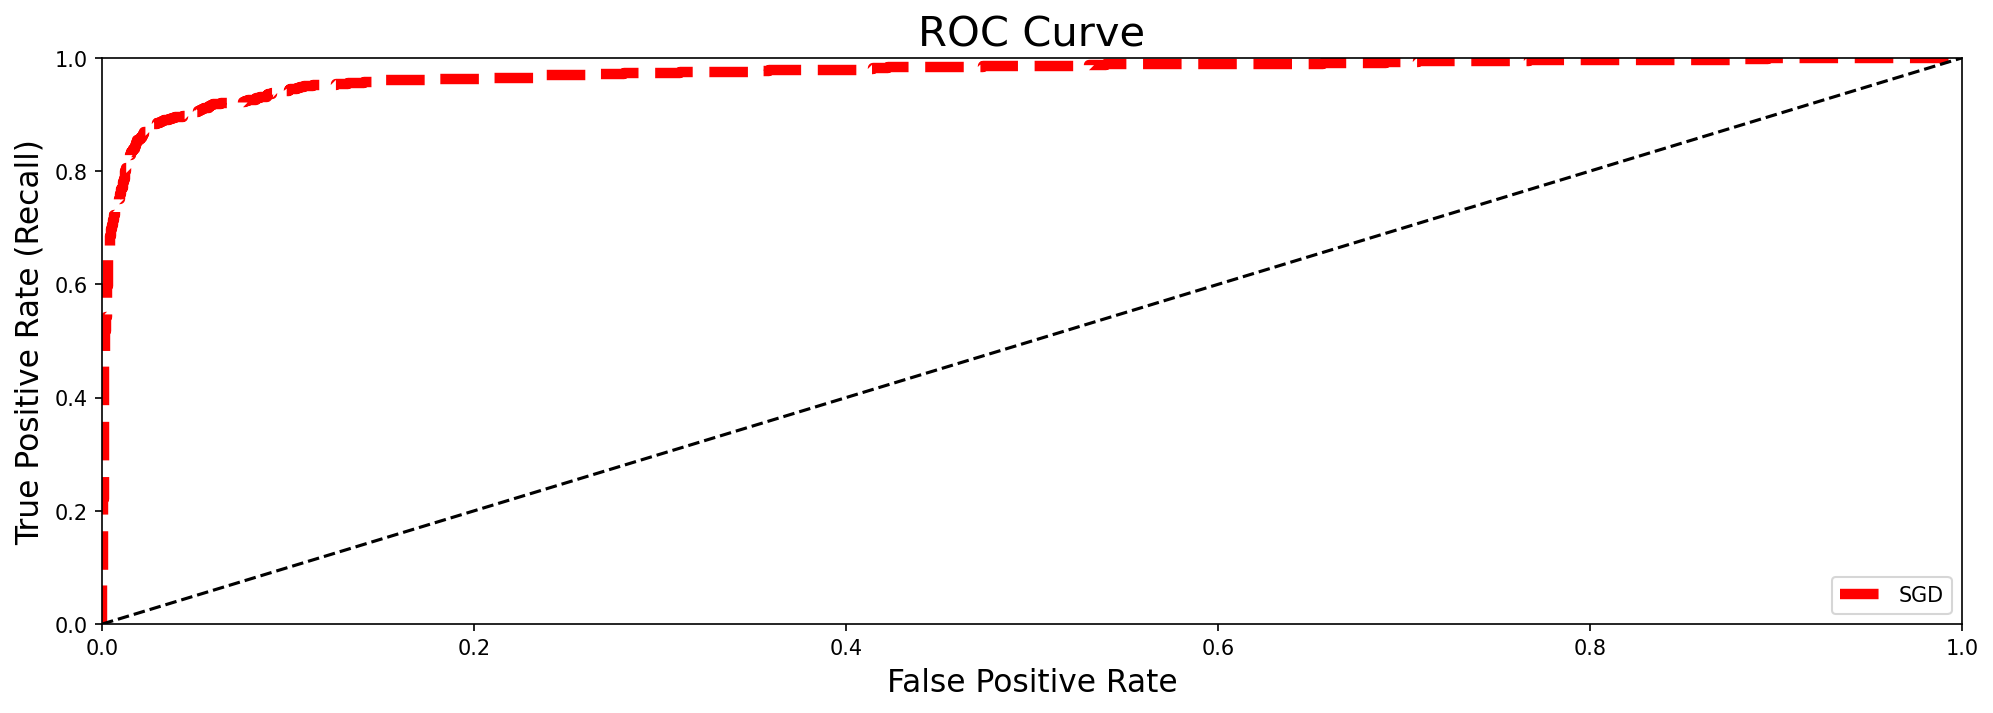

In [160]:
plot_roc_curve(fpr, tpr, 'SGD')

In [161]:
rf_score = pred_score[:, 1]

In [162]:

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_5, rf_score)


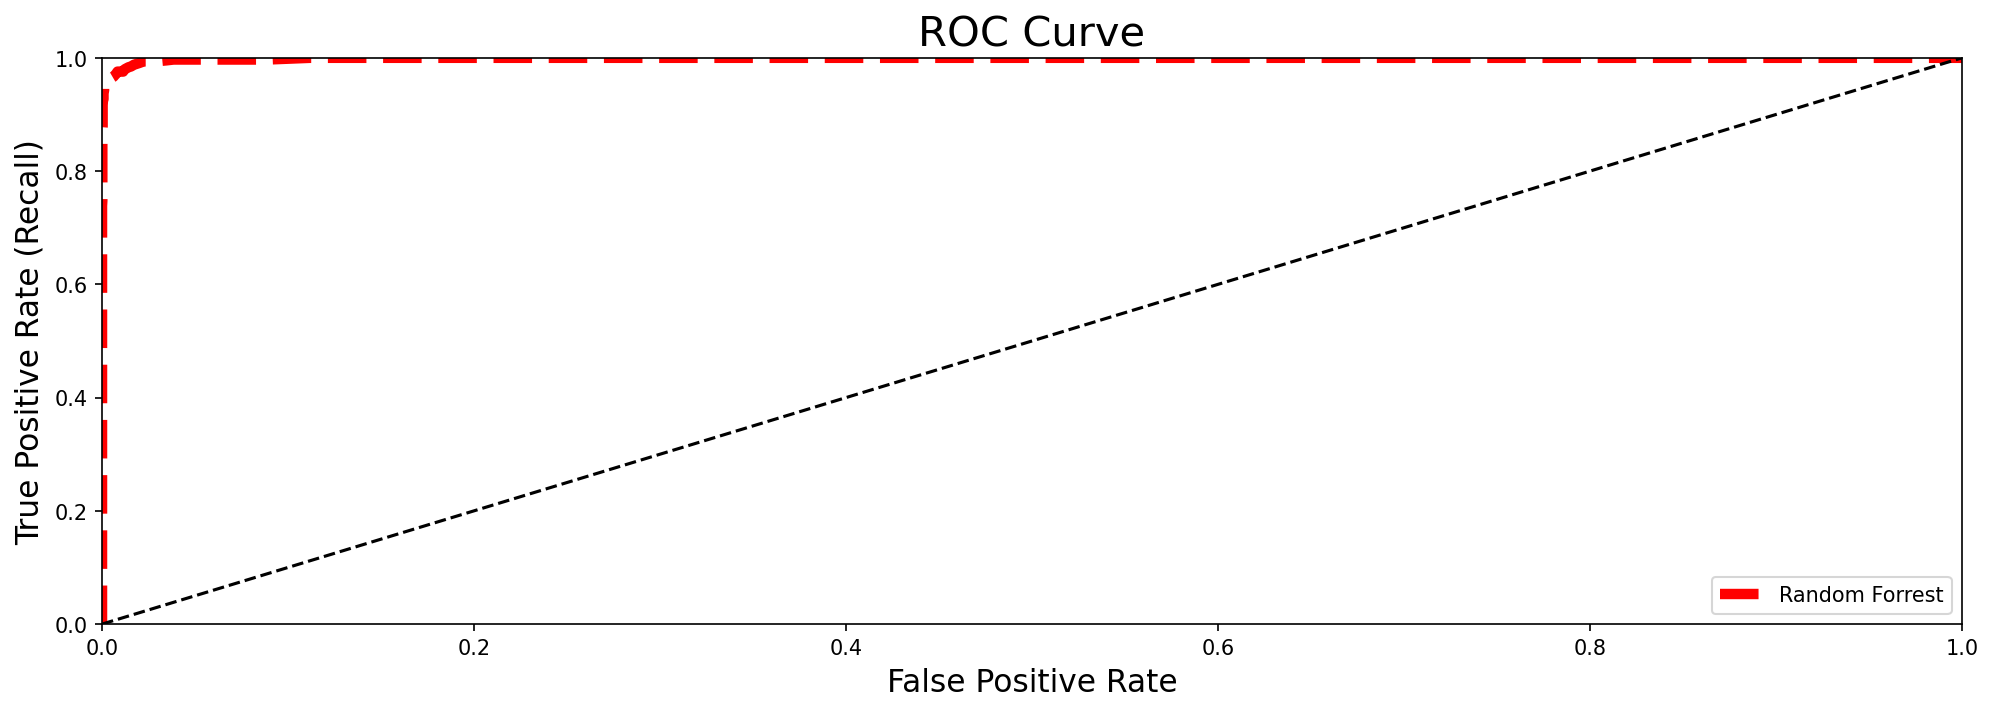

In [163]:
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forrest')

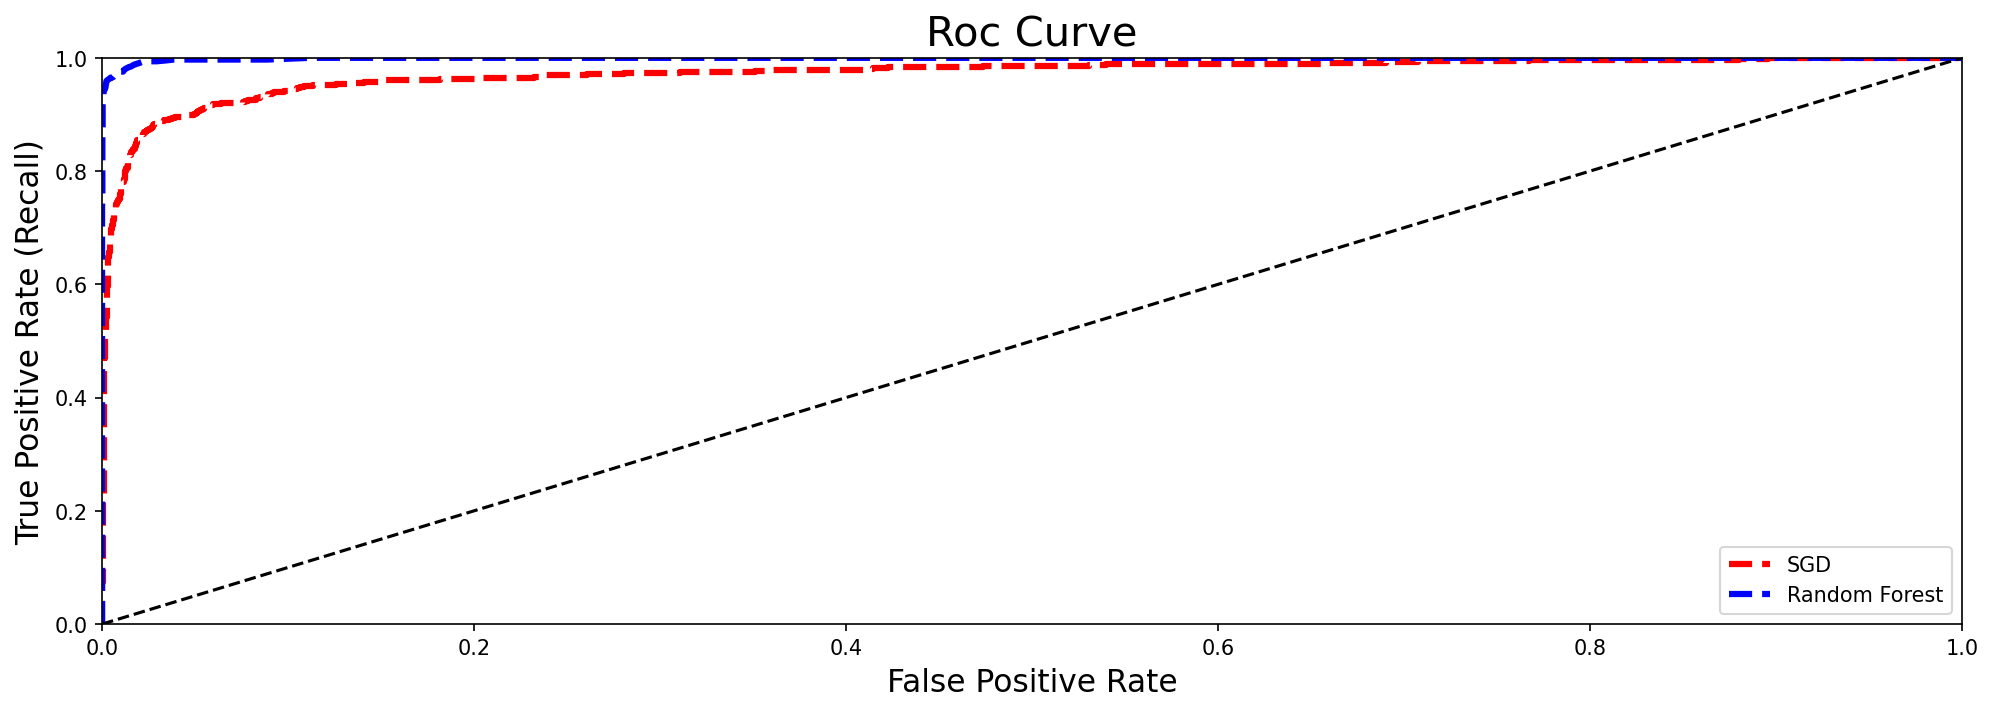

In [164]:
plt.plot(fpr, tpr, 'r--', lw=3, label='SGD')
plt.plot(fpr_rf, tpr_rf, 'b--', lw=3, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.title("Roc Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [165]:

from sklearn.metrics import roc_auc_score

In [166]:
print("SGD: ", roc_auc_score(y_test_5, y_pred_score,))
print("Random Forest: ", roc_auc_score(y_test_5, pred_score[:, 1]))

SGD:  0.9725458874546016
Random Forest:  0.9991246181437208


In [167]:

print("Precision : ", precision_score(y_test_5, pred))
print("Recall: ", recall_score(y_test_5, pred))

Precision :  0.9966101694915255
Recall:  0.8936170212765957
